## 순환 신경망

### IMDB 리뷰 데이터셋

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=300)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
train_seq = pad_sequences(train_input, maxlen=100)

In [9]:
train_seq.shape

(20000, 100)

In [20]:
# 데이터 전처리
vel_seq = pad_sequences(val_input, maxlen=100)

In [26]:
from tensorflow import keras

In [27]:
model = keras.Sequential()

In [28]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [29]:
train_oh = keras.utils.to_categorical(train_seq)

In [30]:
train_oh.shape

(20000, 100, 300)

In [24]:
# train_oh[0][0][:]

In [32]:
val_oh = keras.utils.to_categorical(vel_seq)

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)  │ (None, 8)           │      2,472 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense (Dense)             │ (None, 1)           │          9 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
cp_cb = keras.callbacks.ModelCheckpoint('best_rnn.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5088 - loss: 0.7039 - val_accuracy: 0.5240 - val_loss: 0.6958
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5371 - loss: 0.6888 - val_accuracy: 0.5716 - val_loss: 0.6803
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5953 - loss: 0.6665 - val_accuracy: 0.6104 - val_loss: 0.6588
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6387 - loss: 0.6433 - val_accuracy: 0.6420 - val_loss: 0.6397
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6684 - loss: 0.6236 - val_accuracy: 0.6570 - val_loss: 0.6242
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6912 - loss: 0.6044 - val_accuracy: 0.6784 - val_loss: 0.6116
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7068 - loss: 0.5912 - val_accuracy: 0.6886 - val_loss: 0.5979
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7142 - loss: 0.5792 - 

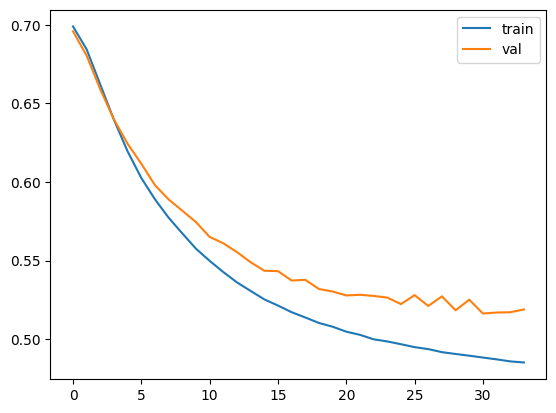

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

In [43]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [44]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding_1 (Embedding)   │ ?                   │          0 │
│                           │                     │  (unbuilt) │
├───────────────────────────┼─────────────────────┼────────────┤
│ simple_rnn_5 (SimpleRNN)  │ ?                   │          0 │
│                           │                     │  (unbuilt) │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_2 (Dense)           │ ?                   │          0 │
│                           │                     │  (unbuilt) │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
cp_cb = keras.callbacks.ModelCheckpoint('best_rnn.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(vel_seq, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5057 - loss: 0.6936 - val_accuracy: 0.6046 - val_loss: 0.6824
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6124 - loss: 0.6793 - val_accuracy: 0.6444 - val_loss: 0.6697
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6685 - loss: 0.6623 - val_accuracy: 0.6906 - val_loss: 0.6543
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6959 - loss: 0.6485 - val_accuracy: 0.6848 - val_loss: 0.6431
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7051 - loss: 0.6354 - val_accuracy: 0.7074 - val_loss: 0.6289
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7137 - loss: 0.6215 - val_accuracy: 0.6924 - val_loss: 0.6235
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7260 - loss: 0.6073 - val_accuracy: 0.7018 - val_loss: 0.6101
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7323 - loss: 0.5942 - 